<a href="https://colab.research.google.com/github/hvauchar/SAMHAR-COVID19-Hackathon/blob/master/Kaggle_CNN_COVID19_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/covid19
!pwd
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/covid19
/content/gdrive/My Drive/covid19
augmentation-Kaggle-CNN-COVID19.ipynb  DataAnalysis.ipynb	  kaggle.ipynb
chest-xray-pneumonia.zip	       heart-data-download.ipynb  models
CNN-COVID19.ipynb		       Kaggle-CNN-COVID19.ipynb   train


**Import all the necessary packages required and Make sure your on Tensorflow version 2.2.0-rc3** 

In [0]:
import tensorflow as tf
print(tf.__version__)
import datetime
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, SeparableConv2D, BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

2.2.0-rc3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download the kaggle dataset from this [link](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) and put the zip file in folder with name train and then unzip the dataset 

In [0]:
path_train = 'train/chest_xray/train/'
path_test = 'train/chest_xray/test/'
path_val = 'train/chest_xray/val/'

Load the dataset and preprocess images by 

1.   resizing it (250x250) Note that we are resizing it to small size just because of limited computational resources ideally the size should not be the same.
2.   Normalize Images by scaling pixels between 0 - 1 by dividing image by 255.
3. Append the Lables and Images to a list and shuffel it make sure we wrote the logic of **Under-Sampling** the data with in the function.
4. Reshape Images and lables.
5. Create train and test set and return it.




In [0]:
CATEGORIES = ['NORMAL','PNEUMONIA']
IMG_SIZE=250
def create_training_data(dirlist):
  training_data=[]
  c = 0
  for DATADIR in dirlist:
    category0 = CATEGORIES[0]
    path = os.path.join(DATADIR,category0)
    class_num = CATEGORIES.index(category0)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))/255.0
        training_data.append([new_array,class_num])
        c += 1-
      except Exception as e:
        print(e)
    category1 = CATEGORIES[1]
    path = os.path.join(DATADIR,category1)
    class_num = CATEGORIES.index(category1)
    for img in os.listdir(path):
      if(c>=0):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))/255.0
          training_data.append([new_array,class_num])
          c -= 1
        except Exception as e:
          print(e)
      else:
        break
  random.shuffle(training_data)
  X=[]
  Y=[]
  for fetures, lable in training_data:
    X.append(fetures)
    Y.append(lable)
  X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  print(collections.Counter(Y))
  return(train_test_split(X,np.array(Y).reshape(-1,1),test_size=0.3, random_state=42))
dirlist = [path_val,path_test,path_train]

In [0]:
X_train, X_test, y_train, y_test = create_training_data(dirlist)


train/chest_xray/val/

0

train/chest_xray/test/

-1

train/chest_xray/train/

-1
Counter({1: 1584, 0: 1583})


In [0]:
for i in (X_train, X_test, y_train, y_test):
  print(i.shape)

(2216, 250, 250, 1)
(951, 250, 250, 1)
(2216, 1)
(951, 1)


Define the model and compile it with Binary Crossentropy loss and Adam as optimizer 

In [0]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(IMG_SIZE, IMG_SIZE,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 248, 248, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                15241280  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
history = model.fit(X_train,  y_train, epochs=5,validation_split=0.1)

Epoch 1/5
63/63 [==============================] - 42s 675ms/step - loss: 0.7322 - accuracy: 0.7237 - val_loss: 0.2617 - val_accuracy: 0.9099
Epoch 2/5
63/63 [==============================] - 43s 676ms/step - loss: 0.2111 - accuracy: 0.9162 - val_loss: 0.5256 - val_accuracy: 0.8604
Epoch 3/5
63/63 [==============================] - 42s 663ms/step - loss: 0.1709 - accuracy: 0.9348 - val_loss: 0.3912 - val_accuracy: 0.8919
Epoch 4/5
63/63 [==============================] - 42s 664ms/step - loss: 0.1514 - accuracy: 0.9478 - val_loss: 0.2141 - val_accuracy: 0.9099
Epoch 5/5
63/63 [==============================] - 42s 671ms/step - loss: 0.1252 - accuracy: 0.9584 - val_loss: 0.2479 - val_accuracy: 0.9234


Plot the training progress

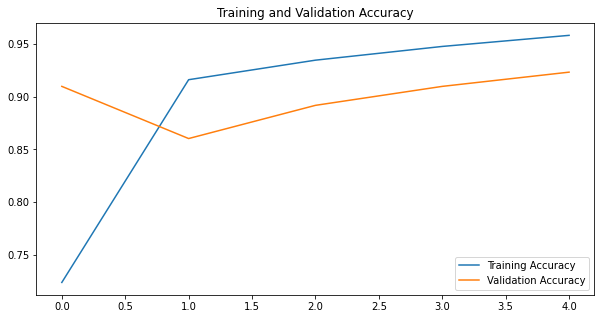

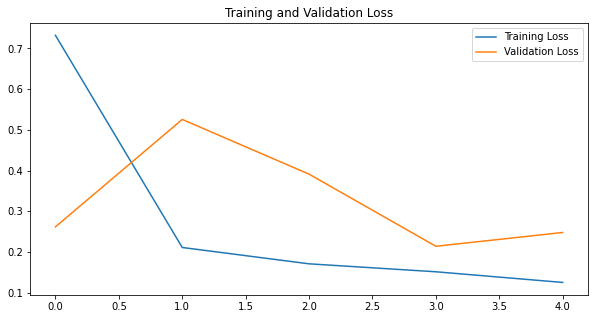

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)
plt.figure(figsize=(10,5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Check model performance on test data

In [0]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 2s 81ms/step - loss: 0.1584 - accuracy: 0.9422


[0.15840044617652893, 0.9421661496162415]

Conver grayscale image to RGB to make images compatible for **Transfer Learning**

In [0]:
tensorImg = tf.convert_to_tensor(X_test, dtype=None, dtype_hint=None, name=None)
TestTensor = tf.image.grayscale_to_rgb(
    tensorImg,
    name=None
)

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
trainTensor = tf.convert_to_tensor(X_train, dtype=None, dtype_hint=None, name=None)
Train_rbg = tf.image.grayscale_to_rgb(
    tensorImg,
    name=None
)

Create the base model from the pre-trained model **MobileNet V2**

In [0]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Un-freeze the top layers of the model In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

In [0]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
model1 = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])
base_learning_rate = 0.0001
model1.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model1.fit(Train_rbg,  y_train, epochs=15,validation_split=0.1)

Epoch 1/15
27/27 [==============================] - 10s 375ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 1.7129 - val_accuracy: 0.4792
Epoch 2/15
27/27 [==============================] - 10s 368ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 1.1755 - val_accuracy: 0.4688
Epoch 3/15
27/27 [==============================] - 10s 368ms/step - loss: 0.0074 - accuracy: 0.9988 - val_loss: 1.6193 - val_accuracy: 0.4792
Epoch 4/15
27/27 [==============================] - 10s 361ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 1.3336 - val_accuracy: 0.5000
Epoch 5/15
27/27 [==============================] - 10s 376ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.6939 - val_accuracy: 0.4896
Epoch 6/15
27/27 [==============================] - 10s 371ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 3.9331 - val_accuracy: 0.4688
Epoch 7/15
27/27 [==============================] - 10s 387ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 4.3641 - val_accuracy: 0.4688

In [0]:
model1.evaluate(rbg,y_test)

30/30 [==============================] - 5s 166ms/step - loss: 1.0539 - accuracy: 0.6141


[1.053870677947998, 0.6140904426574707]

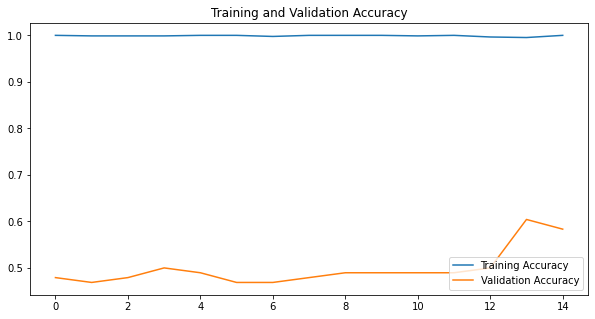

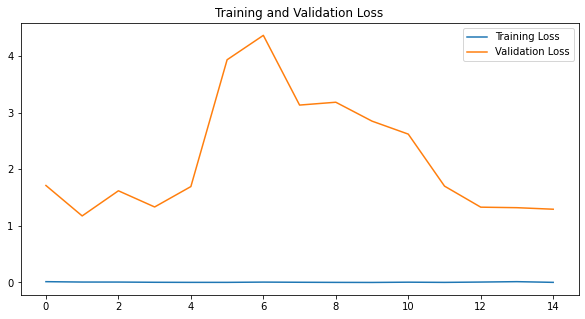

In [0]:
model1.evaluate(rbg,y_test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)
plt.figure(figsize=(10,5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Do the same with other pre-trained architectures

In [0]:
base_model2 = VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
base_model2.trainable = True
print("Number of layers in the base model: ", len(base_model2.layers))
fine_tune_at = 10
for layer in base_model2.layers[:fine_tune_at]:
  layer.trainable =  False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
model2 = tf.keras.Sequential([
  base_model2,
  global_average_layer,
  prediction_layer
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Number of layers in the base model:  19


In [0]:
history = model2.fit(Train_rbg,  y_train, epochs=15,validation_split=0.1)

Epoch 1/15
27/27 [==============================] - 64s 2s/step - loss: 1.3280 - accuracy: 0.5099 - val_loss: 0.6958 - val_accuracy: 0.5312
Epoch 2/15
27/27 [==============================] - 64s 2s/step - loss: 0.6928 - accuracy: 0.5170 - val_loss: 2.2072 - val_accuracy: 0.5312
Epoch 3/15
27/27 [==============================] - 64s 2s/step - loss: 0.7603 - accuracy: 0.5170 - val_loss: 0.6932 - val_accuracy: 0.5312
Epoch 4/15
27/27 [==============================] - 65s 2s/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6931 - val_accuracy: 0.5312
Epoch 5/15
27/27 [==============================] - 64s 2s/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5312
Epoch 6/15
27/27 [==============================] - 64s 2s/step - loss: 0.6930 - accuracy: 0.5170 - val_loss: 0.6929 - val_accuracy: 0.5312
Epoch 7/15
27/27 [==============================] - 64s 2s/step - loss: 0.6930 - accuracy: 0.5170 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 8/15
27/27 [==

30/30 [==============================] - 33s 1s/step - loss: 0.6940 - accuracy: 0.4784


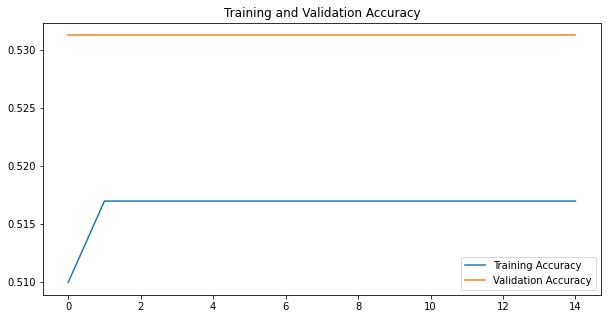

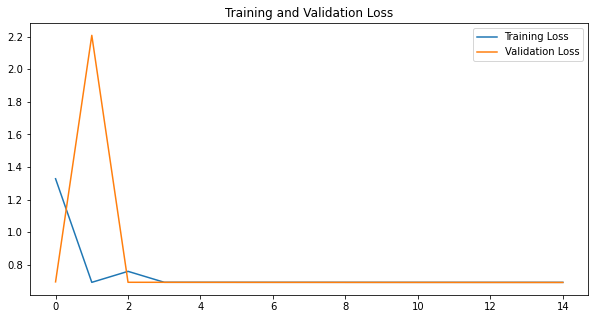

In [0]:
model2.evaluate(rbg,y_test)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(15)
plt.figure(figsize=(10,5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()